In [1]:
#Import Libraries

import os
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import random
import matplotlib.pyplot as plt
import seaborn as sns
random.seed(1)


# Load the SAS XPT file
data = pd.read_sas("/Users/troytoy/Downloads/LLCP2023.XPT", format="xport")


/opt/anaconda3/lib/python3.12/site-packages/pandas/io/sas/sas_xport.py:475: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[x] = v


In [2]:
# Select specific columns for processing
brfss_df_selected = data[['DIABETE4',        # Diagnosed with diabetes status (Yes/No/Borderline)
                          '_BMI5',          # Body Mass Index (BMI) calculated
                          '_RFBMI5',        # Risk factor for obesity (BMI > 30)
                          '_RFHYPE6',       # Hypertension status (Yes/No)
                          'TOLDHI3',        # High cholesterol diagnosis (Yes/No)
                          '_CHOLCH3',       # Cholesterol checked in past 5 years
                          'CHCKDNY2',       # Chronic kidney disease diagnosis (Yes/No)
                          'SMOKE100',       # Smoked 100 cigarettes in lifetime (Yes/No)
                          '_RFDRHV8',       # Heavy alcohol drinking status
                          'CVDSTRK3',       # Ever had a stroke (Yes/No)
                          '_MICHD',         # Ever had myocardial infarction (Yes/No)
                          '_TOTINDA',       # Total physical activity indicator (Active/Inactive)
                          'GENHLTH',        # General health status (Excellent to Poor)
                          'PHYSHLTH',       # Number of physically unhealthy days in the past 30 days
                          'MENTHLTH',       # Number of mentally unhealthy days in the past 30 days
                          'DIFFWALK',       # Difficulty walking or climbing stairs (Yes/No)
                          '_HLTHPL1',       # Has any health care coverage (Yes/No)
                          'MEDCOST1',       # Couldn't see a doctor due to cost (Yes/No)
                          'CHECKUP1',       # Last routine check-up time frame
                          '_SEX',           # Sex of respondent (Male/Female)
                          '_AGEG5YR',       # Age group (5-year intervals)
                          'EDUCA',          # Education level
                          'INCOME3']]       # Income level

In [3]:

#check how many rows and columns are left
brfss_df_selected.shape

(433323, 23)

In [4]:
brfss_df_selected.head()

,DIABETE4,_BMI5,_RFBMI5,_RFHYPE6,TOLDHI3,_CHOLCH3,CHCKDNY2,SMOKE100,_RFDRHV8,CVDSTRK3,...,PHYSHLTH,MENTHLTH,DIFFWALK,_HLTHPL1,MEDCOST1,CHECKUP1,_SEX,_AGEG5YR,EDUCA,INCOME3
0,1.0,3047.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,...,88.0,88.0,1.0,1.0,2.0,2.0,2.0,13.0,5.0,99.0
1,3.0,2856.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,...,88.0,88.0,2.0,1.0,2.0,2.0,2.0,13.0,5.0,99.0
2,3.0,2231.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,...,6.0,2.0,1.0,1.0,1.0,1.0,2.0,13.0,4.0,2.0
3,3.0,2744.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,...,2.0,88.0,1.0,1.0,2.0,3.0,2.0,12.0,5.0,99.0
4,1.0,2585.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,...,88.0,88.0,1.0,1.0,2.0,1.0,2.0,12.0,5.0,7.0


In [5]:
#Drop missing values from the datafame - knocks 100,000 rows right away
brfss_df_selected = brfss_df_selected.dropna()
brfss_df_selected.shape

(338867, 23)

In [6]:
# DIABETE4 : Diabetes Awareness

'''Making this ordinal. Set :
0 for no diabetes or for only during pregnancy, 
1 for pre-diabetes or borderline diabetes, 
2 is for yes diabetes. '''
# Remove all 7 (don't knows)
# remove all 9 (refused to answer)

brfss_df_selected['DIABETE4'] = brfss_df_selected['DIABETE4'].replace({2:0, 3:0, 1:2, 4:1})
#remove rows where the value of the column DIABETE4 is equal to 7 and 9.
brfss_df_selected = brfss_df_selected[brfss_df_selected.DIABETE4 != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.DIABETE4 != 9]
# verify the effectiveness of the filtering operations by displaying the remaining unique values
brfss_df_selected.DIABETE4.unique()

array([2., 0., 1.])

In [7]:
#Check the shape of the dataset now: We have 234951 cleaned rows and 25 columns (1 of which is our dependent variable)
brfss_df_selected.shape

(338433, 23)

In [8]:
#Check how the data looks after Modifying Values
brfss_df_selected.head()

,DIABETE4,_BMI5,_RFBMI5,_RFHYPE6,TOLDHI3,_CHOLCH3,CHCKDNY2,SMOKE100,_RFDRHV8,CVDSTRK3,...,PHYSHLTH,MENTHLTH,DIFFWALK,_HLTHPL1,MEDCOST1,CHECKUP1,_SEX,_AGEG5YR,EDUCA,INCOME3
0,2.0,3047.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,...,88.0,88.0,1.0,1.0,2.0,2.0,2.0,13.0,5.0,99.0
1,0.0,2856.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,...,88.0,88.0,2.0,1.0,2.0,2.0,2.0,13.0,5.0,99.0
2,0.0,2231.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,...,6.0,2.0,1.0,1.0,1.0,1.0,2.0,13.0,4.0,2.0
3,0.0,2744.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,...,2.0,88.0,1.0,1.0,2.0,3.0,2.0,12.0,5.0,99.0
4,2.0,2585.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,...,88.0,88.0,1.0,1.0,2.0,1.0,2.0,12.0,5.0,7.0


In [9]:
#Check the size of each class for the diabetes column
brfss_df_selected.groupby(['DIABETE4']).size()

DIABETE4
0.0    278806
1.0      8910
2.0     50717
dtype: int64

In [10]:
#remane column
brfss = brfss_df_selected.rename(columns={
    'DIABETE4': 'Diabetes_Status',          # Diabetes awareness (No/Pre-diabetes/Diabetes)
    '_BMI5': 'BMI',                         # Body Mass Index
    '_RFBMI5': 'Obesity_Indicator',         # Obesity indicator (BMI >= 30)
    '_RFHYPE6': 'Hypertension',             # Hypertension diagnosis
    'TOLDHI3': 'High_Cholesterol',          # High cholesterol diagnosis
    '_CHOLCH3': 'Cholesterol_Checked',      # Cholesterol checked in the past 5 years
    'CHCKDNY2': 'Chronic_Kidney_Disease',   # Chronic kidney disease diagnosis
    'SMOKE100': 'Smoker_100_Cigarettes',    # Smoked at least 100 cigarettes in lifetime
    '_RFDRHV8': 'Heavy_Alcohol_Consumption',# Heavy alcohol consumption
    'CVDSTRK3': 'Stroke',                   # Stroke diagnosis
    '_MICHD': 'Heart_Disease',              # Coronary heart disease or heart attack
    '_TOTINDA': 'Physical_Activity',        # Physical activity indicator
    'GENHLTH': 'General_Health',            # Self-rated general health status
    'PHYSHLTH': 'Physical_Unhealthy_Days',  # Number of physically unhealthy days
    'MENTHLTH': 'Mental_Unhealthy_Days',    # Number of mentally unhealthy days
    'DIFFWALK': 'Difficulty_Walking',       # Difficulty walking or climbing stairs
    '_HLTHPL1': 'Health_Care_Coverage',     # Health care coverage indicator
    'MEDCOST1': 'Doctor_Visit_Cost_Issue',  # Could not see doctor due to cost
    'CHECKUP1': 'Last_Checkup',             # Last routine check-up timeframe
    '_SEX': 'Gender',                       # Gender (Male/Female)
    '_AGEG5YR': 'Age_Group',                # Age group in 5-year intervals
    'EDUCA': 'Education_Level',             # Education level
    'INCOME3': 'Income_Level'               # Annual income level
})
print("Renamed Columns:")
print(brfss.columns)

Renamed Columns:
Index(['Diabetes_Status', 'BMI', 'Obesity_Indicator', 'Hypertension',
       'High_Cholesterol', 'Cholesterol_Checked', 'Chronic_Kidney_Disease',
       'Smoker_100_Cigarettes', 'Heavy_Alcohol_Consumption', 'Stroke',
       'Heart_Disease', 'Physical_Activity', 'General_Health',
       'Physical_Unhealthy_Days', 'Mental_Unhealthy_Days',
       'Difficulty_Walking', 'Health_Care_Coverage', 'Doctor_Visit_Cost_Issue',
       'Last_Checkup', 'Gender', 'Age_Group', 'Education_Level',
       'Income_Level'],
      dtype='object')


In [11]:
brfss.head()

,Diabetes_Status,BMI,Obesity_Indicator,Hypertension,High_Cholesterol,Cholesterol_Checked,Chronic_Kidney_Disease,Smoker_100_Cigarettes,Heavy_Alcohol_Consumption,Stroke,...,Physical_Unhealthy_Days,Mental_Unhealthy_Days,Difficulty_Walking,Health_Care_Coverage,Doctor_Visit_Cost_Issue,Last_Checkup,Gender,Age_Group,Education_Level,Income_Level
0,2.0,3047.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,...,88.0,88.0,1.0,1.0,2.0,2.0,2.0,13.0,5.0,99.0
1,0.0,2856.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,...,88.0,88.0,2.0,1.0,2.0,2.0,2.0,13.0,5.0,99.0
2,0.0,2231.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,...,6.0,2.0,1.0,1.0,1.0,1.0,2.0,13.0,4.0,2.0
3,0.0,2744.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,...,2.0,88.0,1.0,1.0,2.0,3.0,2.0,12.0,5.0,99.0
4,2.0,2585.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,...,88.0,88.0,1.0,1.0,2.0,1.0,2.0,12.0,5.0,7.0


In [12]:
brfss.shape

(338433, 23)

In [13]:
#Check how many respondents have no diabetes, prediabetes or diabetes.
brfss.groupby(['Diabetes_Status']).size()

Diabetes_Status
0.0    278806
1.0      8910
2.0     50717
dtype: int64

In [14]:
brfss.to_csv('diabetes_BRFSS2023.csv', sep=",", index=False)

In [15]:
# Copy the old dataframe to a new one
brfss_binary = brfss.copy()

'''Change:
Diabetic (2) to 1, Pre-diabetic (1) to 0
to have 0 for no diabetes and pre-diabetes, and 1 for diabetes.'''
brfss_binary['Diabetes_Status'] = brfss_binary['Diabetes_Status'].replace({1: 0, 2: 1})

# Rename the column to Diabetes_binary
brfss_binary = brfss_binary.rename(columns={'Diabetes_Status': 'Diabetes_binary'})

# Check unique values in the updated Diabetes_binary column
print("Unique values in Diabetes_binary column:")
print(brfss_binary.Diabetes_binary.unique())

Unique values in Diabetes_binary column:
[1. 0.]


In [16]:
#1 _BMI5 : Body mass index 
# BMI values are BMI * 100 (i.e. BMI of 1850 is really 18.50)
# Divide BMI by 100 and round them to the nearest whole number.

brfss_df_selected['_BMI5'] = brfss_df_selected['_BMI5'].div(100).round(0)
brfss_df_selected._BMI5.unique()

array([ 30.,  29.,  22.,  27.,  26.,  24.,  33.,  23.,  42.,  28.,  36.,
        25.,  38.,  44.,  37.,  31.,  32.,  52.,  34.,  54.,  48.,  20.,
        35.,  40.,  19.,  18.,  21.,  46.,  41.,  47.,  39.,  17.,  49.,
        43.,  45.,  51.,  50.,  16.,  15.,  56.,  13.,  62.,  77.,  68.,
        53.,  59.,  55.,  57.,  67.,  70.,  14.,  63.,  64.,  58.,  66.,
        60.,  65.,  72.,  82.,  61.,  76.,  12.,  86.,  83.,  75.,  71.,
        73.,  74.,  69.,  84.,  81.,  87., 100.,  78.,  95.,  89.,  80.,
        92.,  79.,  97.,  91.,  88.,  90.,  98.,  99.,  94.,  85.])

In [17]:
#2 _RFBMI5 : Body mass index(BMI) greater than 25.00 (Overweight or Obese)
'''Change 1 to 0 for not overweight and obese(1200 <= BMI < 2500)
2 to 1 for yes overweight or obese'''
# Remove all 9 (don't knows and refused to answer)

brfss_df_selected['_RFBMI5'] = brfss_df_selected['_RFBMI5'].replace({1:0, 2:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected._RFBMI5 != 9]
brfss_df_selected._RFBMI5.unique()

array([1., 0.])

In [18]:
#3 _RFHYPE6 : High Blood Pressure Awareness
'''Change :
1 to 0 for no high blood pressure, 
2 to 1 for high blood pressure'''
# Remove all 9 (don't knows and refused to answer)

brfss_df_selected['_RFHYPE6'] = brfss_df_selected['_RFHYPE6'].replace({1:0, 2:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected._RFHYPE6 != 9]
brfss_df_selected._RFHYPE6.unique()

array([1., 0.])

In [19]:
#4 TOLDHI3 : Cholesterol Awareness
'''It has 1 for high cholesterol
only change 2 to 0 for no high cholesterol'''
# Remove all 7 and 9 (don't knows and refused to answer)

brfss_df_selected['TOLDHI3'] = brfss_df_selected['TOLDHI3'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.TOLDHI3 != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.TOLDHI3 != 9]
brfss_df_selected.TOLDHI3.unique()

array([0., 1.])

In [20]:
#5 _CHOLCH3 : Cholesterol check within past five years
'''It has 1 for cholesterol checked in past 5 years,
change and 2,3 to 0 for not checked cholesterol in past 5 years'''
# Remove all 7 and 9 (don't knows and refused to answer)

# Replace values in '_CHOLCH3' column according to mappings
brfss_df_selected['_CHOLCH3'] = brfss_df_selected['_CHOLCH3'].replace({2: 0, 3: 0})
brfss_df_selected = brfss_df_selected[brfss_df_selected._CHOLCH3 != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected._CHOLCH3 != 9]
brfss_df_selected._CHOLCH3.unique()

array([1., 0.])

In [21]:
#6 CHCKDNY2 : Unable to control urine flow or kidney disease
'''It has 1 for yes uncontrollable urine flow
change 2 to 0 for no kidney disease (normal urine flow)'''
# Remove all 7 and 9 (don't knows and refused to answer)

brfss_df_selected['CHCKDNY2'] = brfss_df_selected['CHCKDNY2'].replace({2: 0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.CHCKDNY2 != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.CHCKDNY2 != 9]
brfss_df_selected.CHCKDNY2.unique()

array([0., 1.])

In [22]:
#7 SMOKE100 : Smoked at least 100 Cigarettes
'''It has 1 for yes smoked
change 2 to 0 for not smoked'''
# Remove all 7 and 9 (don't knows and refused to answer)

brfss_df_selected['SMOKE100'] = brfss_df_selected['SMOKE100'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.SMOKE100 != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.SMOKE100 != 9]
brfss_df_selected.SMOKE100.unique()

array([0., 1.])

In [23]:
# 8. _RFDRHV8 : Heavy Alcohol Consumption
'''
Making this binary:
0 for not a heavy drinker,
1 for heavy drinker.
'''
# Remove all 9 (don't knows and refused to answer)
brfss_df_selected['_RFDRHV8'] = brfss_df_selected['_RFDRHV8'].replace({2:1, 1:0})

# Remove rows where the value of _RFDRHV8 is equal to 9 (Don't Know/Refused/Missing)
brfss_df_selected = brfss_df_selected[brfss_df_selected['_RFDRHV8'] != 9]

# Verify the effectiveness of the filtering by displaying the remaining unique values
print("Unique values in _RFDRHV8 after transformation:")
print(brfss_df_selected['_RFDRHV8'].unique())

Unique values in _RFDRHV8 after transformation:
[0. 1.]


In [24]:
#9 CVDSTRK3 : Chronic health conditions
'''It has 1 for yes respondant has had a stroke
only change 2 to 0 for no'''
# Remove all 7 and 9 (don't knows and refused to answer)

brfss_df_selected['CVDSTRK3'] = brfss_df_selected['CVDSTRK3'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.CVDSTRK3 != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.CVDSTRK3 != 9]
brfss_df_selected.CVDSTRK3.unique()

array([0., 1.])

In [25]:
#10 _MICHD : Ever has Coronary Heart Disease (CHD) or Myocardial Infarction(MI)
'''It has 1 for yes respondant has CHD or MI
Change 2 to 0 for respondant does not have CHD or MI'''
brfss_df_selected['_MICHD'] = brfss_df_selected['_MICHD'].replace({2: 0})
brfss_df_selected._MICHD.unique()

array([0., 1.])

In [26]:
#11 _TOTINDA : Does physical activity or exercise
'''It has 1 for yes respondant does physical activity or excercise
Change 2 to 0 for not involved in any physical activity or excercise'''
# Remove all 9 (don't knows and refused to answer)

brfss_df_selected['_TOTINDA'] = brfss_df_selected['_TOTINDA'].replace({2: 0})
brfss_df_selected = brfss_df_selected[brfss_df_selected._TOTINDA != 9]
brfss_df_selected._TOTINDA.unique()

array([0., 1.])

In [27]:
#12 GENHLTH : Genreal Health Status
'''This is an ordinal column which will remain as it is
(1 = Excellent, 2 = Very good, 3 = Good, 4 = Fair, 5 = Poor)'''
# Remove all 7 and 9 (don't knows and refused to answer)

brfss_df_selected = brfss_df_selected[brfss_df_selected.GENHLTH != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.GENHLTH != 9]
brfss_df_selected.GENHLTH.unique()

array([2., 4., 3., 1., 5.])

In [28]:
# 13 PHYSHLTH : Number of days Physical Health is good
'''It has a scale of 0-30 days for good physical health days
change 88 to 0 for no as repondant has bad health days'''
# Remove all 77 and 99 (don't knows and refused to answer)

brfss_df_selected['PHYSHLTH'] = brfss_df_selected['PHYSHLTH'].replace({88:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.PHYSHLTH != 77]
brfss_df_selected = brfss_df_selected[brfss_df_selected.PHYSHLTH != 99]
brfss_df_selected.PHYSHLTH.unique()

array([ 0.,  6.,  2.,  8.,  1.,  5.,  4., 15., 30., 21., 10., 25., 14.,
        7., 20.,  3., 12., 26., 24., 18., 13., 28., 16., 17., 11., 22.,
       27.,  9., 29., 23., 19.])

In [29]:
#14 MENTHLTH : Number of days Mental Health is not good
'''It has a scale of 0-30 days for bad mental health days
change 88 to 0 for no as repondant has no bad mental health days(good mental health days)'''
# Remove all 77 and 99 (don't knows and refused to answer)

brfss_df_selected['MENTHLTH'] = brfss_df_selected['MENTHLTH'].replace({88:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.MENTHLTH != 77]
brfss_df_selected = brfss_df_selected[brfss_df_selected.MENTHLTH != 99]
brfss_df_selected.MENTHLTH.unique()

array([ 0.,  2.,  3., 25., 10., 30., 20., 15.,  5., 12.,  4.,  1.,  6.,
       21.,  7., 14., 29.,  8., 16., 17.,  9., 28., 11., 18., 22., 24.,
       13., 27., 26., 19., 23.])

In [30]:
#15 DIFFWALK : Difficulty Walking or climbing stairs
'''It has 1 for yes difficulty walking or climbing stairs
change 2 to 0 for no difficulty walking or climbing stairs'''
# Remove all 7 and 9 (don't knows and refused to answer)

brfss_df_selected['DIFFWALK'] = brfss_df_selected['DIFFWALK'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.DIFFWALK != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.DIFFWALK != 9]
brfss_df_selected.DIFFWALK.unique()

array([1., 0.])

In [31]:
#16 _HLTHPL1 : Have any health care access or insurance
'''It has 1 for yes respondant has health care access
change 2 to 0 for no health care access'''
# Remove all 7 and 9 (don't knows and refused to answer)

brfss_df_selected['_HLTHPL1'] = brfss_df_selected['_HLTHPL1'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected._HLTHPL1 != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected._HLTHPL1 != 9]
brfss_df_selected._HLTHPL1.unique()

array([1., 0.])

In [32]:
#17 MEDCOST1 : Couldn't afford to see a doctor
'''It has 1 for yes 
change 2 to 0 for no couldn't afford to see a doctor when needed'''
# Remove all 7 and 9 (don't knows and refused to answer)

brfss_df_selected['MEDCOST1'] = brfss_df_selected['MEDCOST1'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.MEDCOST1 != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.MEDCOST1 != 9]
brfss_df_selected.MEDCOST1.unique()

array([0., 1.])

In [33]:
#18 CHECKUP1 : Last routine check up
'''It is already an ordinal column with:
1 = Within past year (anytime less than 12 months ago)
2 = Within past 2 years (1 year but less than 2 years ago)
3 = Within past 5 years (2 years but less than 5 years ago)
4 = 5 or more years ago
Change 8 to 5 for Never'''
# Remove all 7 and 9 (don't knows and refused to answer)

brfss_df_selected['CHECKUP1'] = brfss_df_selected['CHECKUP1'].replace({8:5})
brfss_df_selected = brfss_df_selected[brfss_df_selected.CHECKUP1 != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.CHECKUP1 != 9]
brfss_df_selected.CHECKUP1.unique()

array([2., 1., 3., 5., 4.])

In [34]:
#19 _SEX : Respondant's SEX
'''Set 0 for female (change 2 to 0)
and 1 for male because men comparatively are at higher risk for heart disease'''
brfss_df_selected['_SEX'] = brfss_df_selected['_SEX'].replace({2:0})
brfss_df_selected._SEX.unique()

array([0., 1.])

In [35]:
#20 _AGEG5YR : Reported age in five-year age categories
'''It is already ordinal with 5 year interval
It starts with 1 for age 18-24 all the way to 13 for 80 years and older'''
# Remove 14 for missing and don't know values

brfss_df_selected = brfss_df_selected[brfss_df_selected._AGEG5YR != 14]
brfss_df_selected._AGEG5YR.unique()

array([13., 12.,  9.,  8., 10., 11.,  6.,  4.,  5.,  7.,  2.,  1.,  3.])

In [36]:
#21 EDUCA : Education Level
'''It is an ordinal column with: 
1 = never attended education(school or kindergarten)
2 = Elementary school
3 = Some high school
4 = Grade 12 or GED (High school graduate)
5 = College 1 year to 3 years (Some college or technical school)
6 = college graduate(4 years or more)'''
# Remove all 9 (refused to answer)

brfss_df_selected = brfss_df_selected[brfss_df_selected.EDUCA != 9]
brfss_df_selected.EDUCA.unique()

array([5., 4., 6., 3., 2., 1.])

In [37]:
#22 INCOME3 : Annual Income level
'''It is already ordinal with 1 for less than $10,000 all the way up to 8 being $75,000 or more'''
# Remove all 77 and 99 (don't knows and refused to answer)

brfss_df_selected = brfss_df_selected[brfss_df_selected.INCOME3 != 77]
brfss_df_selected = brfss_df_selected[brfss_df_selected.INCOME3 != 99]
brfss_df_selected.INCOME3.unique()

array([ 2.,  7.,  6.,  9.,  3.,  5.,  4.,  8., 11., 10.,  1.])

In [38]:
#Check the shape of the dataset now: We have 234951 cleaned rows and 25 columns (1 of which is our dependent variable)
brfss_df_selected.shape

(259851, 23)

In [39]:
#Check how the data looks after Modifying Values
brfss_df_selected.head()

,DIABETE4,_BMI5,_RFBMI5,_RFHYPE6,TOLDHI3,_CHOLCH3,CHCKDNY2,SMOKE100,_RFDRHV8,CVDSTRK3,...,PHYSHLTH,MENTHLTH,DIFFWALK,_HLTHPL1,MEDCOST1,CHECKUP1,_SEX,_AGEG5YR,EDUCA,INCOME3
2,0.0,22.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,6.0,2.0,1.0,1.0,1.0,1.0,0.0,13.0,4.0,2.0
4,2.0,26.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,12.0,5.0,7.0
5,0.0,30.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,2.0,3.0,0.0,1.0,0.0,1.0,0.0,9.0,5.0,7.0
8,0.0,33.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,5.0,0.0,1.0,1.0,0.0,1.0,0.0,13.0,5.0,6.0
9,2.0,23.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,12.0,4.0,7.0


In [40]:
#Check the size of each class for the diabetes column
brfss_df_selected.groupby(['DIABETE4']).size()

DIABETE4
0.0    215430
1.0      6512
2.0     37909
dtype: int64

In [41]:
brfss = brfss_df_selected.rename(columns={
    'DIABETE4': 'Diabetes_Status',          # Diabetes awareness (No/Pre-diabetes/Diabetes)
    '_BMI5': 'BMI',                         # Body Mass Index
    '_RFBMI5': 'Obesity_Indicator',         # Obesity indicator (BMI >= 30)
    '_RFHYPE6': 'Hypertension',             # Hypertension diagnosis
    'TOLDHI3': 'High_Cholesterol',          # High cholesterol diagnosis
    '_CHOLCH3': 'Cholesterol_Checked',      # Cholesterol checked in the past 5 years
    'CHCKDNY2': 'Chronic_Kidney_Disease',   # Chronic kidney disease diagnosis
    'SMOKE100': 'Smoker_100_Cigarettes',    # Smoked at least 100 cigarettes in lifetime
    '_RFDRHV8': 'Heavy_Alcohol_Consumption',# Heavy alcohol consumption
    'CVDSTRK3': 'Stroke',                   # Stroke diagnosis
    '_MICHD': 'Heart_Disease',              # Coronary heart disease or heart attack
    '_TOTINDA': 'Physical_Activity',        # Physical activity indicator
    'GENHLTH': 'General_Health',            # Self-rated general health status
    'PHYSHLTH': 'Physical_Unhealthy_Days',  # Number of physically unhealthy days
    'MENTHLTH': 'Mental_Unhealthy_Days',    # Number of mentally unhealthy days
    'DIFFWALK': 'Difficulty_Walking',       # Difficulty walking or climbing stairs
    '_HLTHPL1': 'Health_Care_Coverage',     # Health care coverage indicator
    'MEDCOST1': 'Doctor_Visit_Cost_Issue',  # Could not see doctor due to cost
    'CHECKUP1': 'Last_Checkup',             # Last routine check-up timeframe
    '_SEX': 'Gender',                       # Gender (Male/Female)
    '_AGEG5YR': 'Age_Group',                # Age group in 5-year intervals
    'EDUCA': 'Education_Level',             # Education level
    'INCOME3': 'Income_Level'               # Annual income level
})
print("Renamed Columns:")
print(brfss.columns)

Renamed Columns:
Index(['Diabetes_Status', 'BMI', 'Obesity_Indicator', 'Hypertension',
       'High_Cholesterol', 'Cholesterol_Checked', 'Chronic_Kidney_Disease',
       'Smoker_100_Cigarettes', 'Heavy_Alcohol_Consumption', 'Stroke',
       'Heart_Disease', 'Physical_Activity', 'General_Health',
       'Physical_Unhealthy_Days', 'Mental_Unhealthy_Days',
       'Difficulty_Walking', 'Health_Care_Coverage', 'Doctor_Visit_Cost_Issue',
       'Last_Checkup', 'Gender', 'Age_Group', 'Education_Level',
       'Income_Level'],
      dtype='object')


In [42]:
brfss.head()

,Diabetes_Status,BMI,Obesity_Indicator,Hypertension,High_Cholesterol,Cholesterol_Checked,Chronic_Kidney_Disease,Smoker_100_Cigarettes,Heavy_Alcohol_Consumption,Stroke,...,Physical_Unhealthy_Days,Mental_Unhealthy_Days,Difficulty_Walking,Health_Care_Coverage,Doctor_Visit_Cost_Issue,Last_Checkup,Gender,Age_Group,Education_Level,Income_Level
2,0.0,22.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,6.0,2.0,1.0,1.0,1.0,1.0,0.0,13.0,4.0,2.0
4,2.0,26.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,12.0,5.0,7.0
5,0.0,30.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,2.0,3.0,0.0,1.0,0.0,1.0,0.0,9.0,5.0,7.0
8,0.0,33.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,5.0,0.0,1.0,1.0,0.0,1.0,0.0,13.0,5.0,6.0
9,2.0,23.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,12.0,4.0,7.0


In [43]:
brfss.shape

(259851, 23)

In [44]:
#Check how many respondents have no diabetes, prediabetes or diabetes.
brfss.groupby(['Diabetes_Status']).size()

Diabetes_Status
0.0    215430
1.0      6512
2.0     37909
dtype: int64

In [45]:
brfss.to_csv('diabetes_BRFSS2023.csv', sep=",", index=False)

In [46]:
#Copy the old dataframe to a new one.
brfss_binary = brfss
'''Change:
diabetic 2 to 1, pre-diabetic 1 to 0
in order to have 0 for no diabetes and pre-diabetes and 1 for respondant has diabetes'''

brfss_binary['Diabetes_Status'] = brfss_binary['Diabetes_Status'].replace({1:0, 2:1})

#Rename the column to DiabetesBinary
brfss_binary = brfss_binary.rename(columns = {'Diabetes_Status': 'Diabetes_binary'})
brfss_binary.Diabetes_binary.unique()

array([0., 1.])

In [47]:
brfss_binary.head()

,Diabetes_binary,BMI,Obesity_Indicator,Hypertension,High_Cholesterol,Cholesterol_Checked,Chronic_Kidney_Disease,Smoker_100_Cigarettes,Heavy_Alcohol_Consumption,Stroke,...,Physical_Unhealthy_Days,Mental_Unhealthy_Days,Difficulty_Walking,Health_Care_Coverage,Doctor_Visit_Cost_Issue,Last_Checkup,Gender,Age_Group,Education_Level,Income_Level
2,0.0,22.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,6.0,2.0,1.0,1.0,1.0,1.0,0.0,13.0,4.0,2.0
4,1.0,26.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,12.0,5.0,7.0
5,0.0,30.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,2.0,3.0,0.0,1.0,0.0,1.0,0.0,9.0,5.0,7.0
8,0.0,33.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,5.0,0.0,1.0,1.0,0.0,1.0,0.0,13.0,5.0,6.0
9,1.0,23.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,12.0,4.0,7.0


In [48]:
#Check size of class
brfss_binary.groupby(['Diabetes_binary']).size()

Diabetes_binary
0.0    221942
1.0     37909
dtype: int64

In [49]:
#Separate the Not Diabetes: 0s ;  Pre-diabetes and Diabetes: 1s, 2s
#Get the 1s
diabetes_mask = brfss_binary['Diabetes_binary'] == 1
brfss_diabetes = brfss_binary[diabetes_mask]

#Get the 0s
no_diabetes_mask = brfss_binary['Diabetes_binary'] == 0
brfss_no_diabetes = brfss_binary[no_diabetes_mask]

'''Select 37909 random cases from the non-diabetes group i.e. 0
we already have 37909 cases from the diabetes risk group'''
brfss_no_diabetes_sampled = brfss_no_diabetes.take(np.random.permutation(len(brfss_no_diabetes))[:37909])

# Append the 37909 1s(diabetes) to the 37909 randomly selected 0s(no diabetes)
brfss_balanced = brfss_no_diabetes_sampled.append(brfss_diabetes, ignore_index=True)

In [50]:
#Now we have a dataset of 75818 rows that is equally balanced with 50% 1s and 50% 0s for the target variable Diabetes_binary
brfss_balanced

,Diabetes_binary,BMI,Obesity_Indicator,Hypertension,High_Cholesterol,Cholesterol_Checked,Chronic_Kidney_Disease,Smoker_100_Cigarettes,Heavy_Alcohol_Consumption,Stroke,...,Physical_Unhealthy_Days,Mental_Unhealthy_Days,Difficulty_Walking,Health_Care_Coverage,Doctor_Visit_Cost_Issue,Last_Checkup,Gender,Age_Group,Education_Level,Income_Level
0,0.0,33.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,2.0,0.0,0.0,1.0,0.0,3.0,0.0,6.0,5.0,9.0
1,0.0,24.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,6.0,8.0
2,0.0,32.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,8.0,6.0,10.0
3,0.0,20.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,7.0,0.0,0.0,0.0,1.0,0.0,3.0,5.0,6.0
4,0.0,38.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,3.0,12.0,0.0,1.0,0.0,1.0,0.0,9.0,6.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75813,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,12.0,5.0,7.0
75814,1.0,33.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,1.0,0.0,1.0,1.0,9.0,6.0,10.0
75815,1.0,29.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,6.0,6.0,8.0
75816,1.0,26.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,11.0,2.0,2.0


In [51]:
#See the perfectly balanced class
brfss_balanced.groupby(['Diabetes_binary']).size()

Diabetes_binary
0.0    37909
1.0    37909
dtype: int64

In [52]:
print(f'brfss_5050={brfss_balanced.shape}',f'brfss_binary={brfss_binary.shape}')

brfss_5050=(75818, 23) brfss_binary=(259851, 23)


In [53]:
#Binary imbalanced dataset (cleaned)
# 2nd save version
brfss_binary.to_csv('diabetes_binary_BRFSS2023.csv', sep=",", index=False)

In [54]:
#Binary balanced dataset (cleaned)
# 3rd save version
brfss_balanced.to_csv('diabetes_binary_5050split_BRFSS2023.csv', sep=",", index=False)

In [55]:
# Load the datasets
df_binary = pd.read_csv('diabetes_binary_BRFSS2023.csv')
df_5050 = pd.read_csv('diabetes_binary_5050split_BRFSS2023.csv')

# Display the first few rows of each dataset
df_binary.head()#, df_5050.head()

,Diabetes_binary,BMI,Obesity_Indicator,Hypertension,High_Cholesterol,Cholesterol_Checked,Chronic_Kidney_Disease,Smoker_100_Cigarettes,Heavy_Alcohol_Consumption,Stroke,...,Physical_Unhealthy_Days,Mental_Unhealthy_Days,Difficulty_Walking,Health_Care_Coverage,Doctor_Visit_Cost_Issue,Last_Checkup,Gender,Age_Group,Education_Level,Income_Level
0,0.0,22.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,6.0,2.0,1.0,1.0,1.0,1.0,0.0,13.0,4.0,2.0
1,1.0,26.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,12.0,5.0,7.0
2,0.0,30.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,2.0,3.0,0.0,1.0,0.0,1.0,0.0,9.0,5.0,7.0
3,0.0,33.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,5.0,0.0,1.0,1.0,0.0,1.0,0.0,13.0,5.0,6.0
4,1.0,23.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,12.0,4.0,7.0


In [56]:
df_binary.info(), df_binary.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259851 entries, 0 to 259850
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Diabetes_binary            259851 non-null  float64
 1   BMI                        259851 non-null  float64
 2   Obesity_Indicator          259851 non-null  float64
 3   Hypertension               259851 non-null  float64
 4   High_Cholesterol           259851 non-null  float64
 5   Cholesterol_Checked        259851 non-null  float64
 6   Chronic_Kidney_Disease     259851 non-null  float64
 7   Smoker_100_Cigarettes      259851 non-null  float64
 8   Heavy_Alcohol_Consumption  259851 non-null  float64
 9   Stroke                     259851 non-null  float64
 10  Heart_Disease              259851 non-null  float64
 11  Physical_Activity          259851 non-null  float64
 12  General_Health             259851 non-null  float64
 13  Physical_Unhealthy_Days    25

(None,
        Diabetes_binary            BMI  Obesity_Indicator   Hypertension  \
 count    259851.000000  259851.000000      259851.000000  259851.000000   
 mean          0.145887      28.823195           0.713647       0.430274   
 std           0.352994       6.517380           0.452057       0.495115   
 min           0.000000      12.000000           0.000000       0.000000   
 25%           0.000000      24.000000           0.000000       0.000000   
 50%           0.000000      28.000000           1.000000       0.000000   
 75%           0.000000      32.000000           1.000000       1.000000   
 max           1.000000     100.000000           1.000000       1.000000   
 
        High_Cholesterol  Cholesterol_Checked  Chronic_Kidney_Disease  \
 count     259851.000000        259851.000000           259851.000000   
 mean           0.420776             0.965904                0.049228   
 std            0.493685             0.181477                0.216345   
 min           

In [57]:
#df_5050.info(), df_5050.describe()

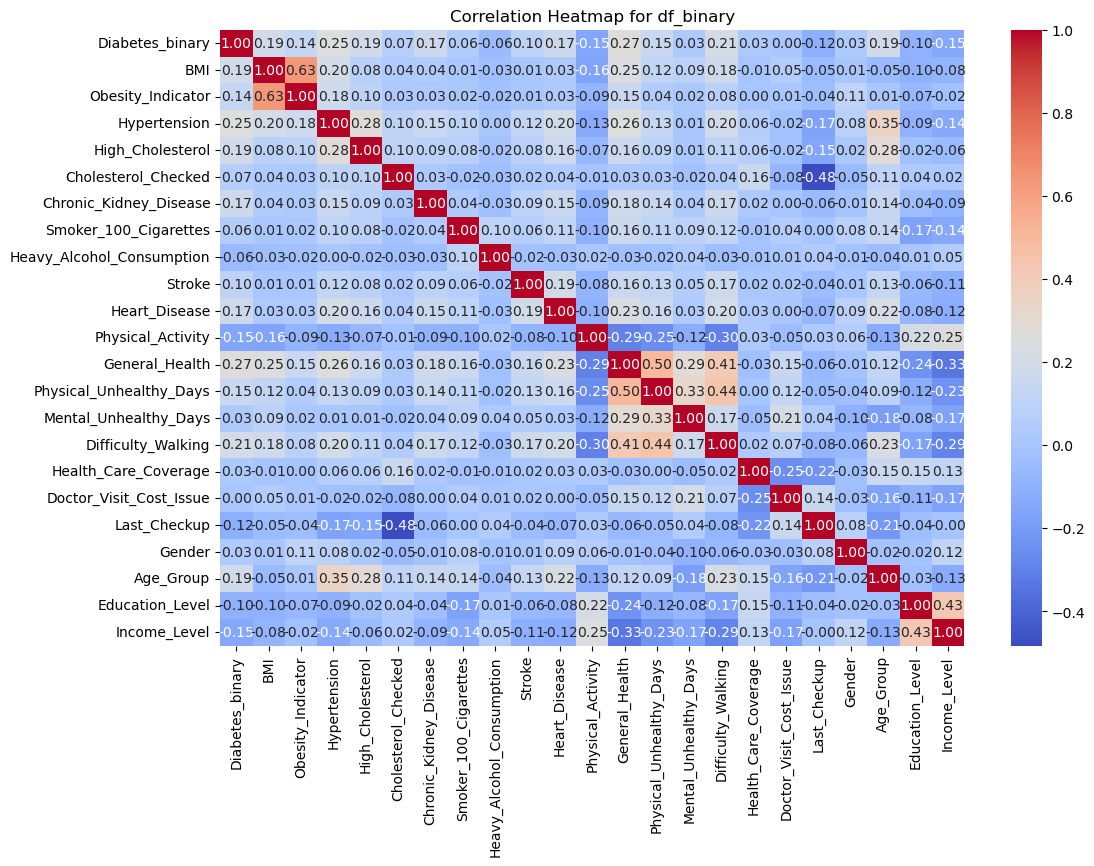

In [58]:
# Correlation heatmap for df_binary
numeric_df_binary = df_binary.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df_binary.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for df_binary')
plt.show()

In [59]:
target_correlations = numeric_df_binary.corr()['Diabetes_binary'].sort_values(ascending=False)
print("Correlations with diabetes_binary:")
print(target_correlations)

Correlations with diabetes_binary:
Diabetes_binary              1.000000
General_Health               0.265843
Hypertension                 0.254714
Difficulty_Walking           0.206021
BMI                          0.192920
Age_Group                    0.191139
High_Cholesterol             0.190220
Chronic_Kidney_Disease       0.169107
Heart_Disease                0.166962
Physical_Unhealthy_Days      0.153050
Obesity_Indicator            0.135037
Stroke                       0.101741
Cholesterol_Checked          0.066536
Smoker_100_Cigarettes        0.055460
Gender                       0.033869
Mental_Unhealthy_Days        0.032832
Health_Care_Coverage         0.028766
Doctor_Visit_Cost_Issue      0.004866
Heavy_Alcohol_Consumption   -0.059569
Education_Level             -0.104586
Last_Checkup                -0.116178
Income_Level                -0.146649
Physical_Activity           -0.152722
Name: Diabetes_binary, dtype: float64


In [60]:
# Exclude the target variable itself and select the top 5
top_5_features = target_correlations.index[1:6]  # Skip the first index (target variable itself)
top_5_values = target_correlations[1:6]

# Display the results
print("Top 5 Features Correlated with Diabetes_binary:")
for feature, value in zip(top_5_features, top_5_values):
    print(f"{feature}: {value:.2f}")

Top 5 Features Correlated with Diabetes_binary:
General_Health: 0.27
Hypertension: 0.25
Difficulty_Walking: 0.21
BMI: 0.19
Age_Group: 0.19


In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Prepare the DataFrame with the top 5 features
X_top5 = df_binary[top_5_features]

# Add a constant for the intercept
X_top5 = sm.add_constant(X_top5)

# Calculate VIF for each feature
vif_data = pd.DataFrame({
    "Feature": X_top5.columns,
    "VIF": [variance_inflation_factor(X_top5.values, i) for i in range(X_top5.shape[1])]
})

# Display VIF
print("Variance Inflation Factor (VIF) for Top 5 Features:")
print(vif_data)

Variance Inflation Factor (VIF) for Top 5 Features:
              Feature        VIF
0               const  32.794860
1      General_Health   1.287496
2        Hypertension   1.245694
3  Difficulty_Walking   1.271063
4                 BMI   1.123622
5           Age_Group   1.206208


In [62]:
X = df_binary[top_5_features]
y = df_binary['Diabetes_binary']  # Dependent variable

# Add a constant for the intercept
X_with_constant = sm.add_constant(X)

# Logistic Regression Model
logit_model = sm.Logit(y, X_with_constant)
result = logit_model.fit()

# Print the summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.344487
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:        Diabetes_binary   No. Observations:               259851
Model:                          Logit   Df Residuals:                   259845
Method:                           MLE   Df Model:                            5
Date:                Tue, 10 Dec 2024   Pseudo R-squ.:                  0.1709
Time:                        17:02:54   Log-Likelihood:                -89515.
converged:                       True   LL-Null:                   -1.0797e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -6.9371      0.043   -163.105      0.000      -7.020      -6.854
Gener

In [63]:
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency, ttest_ind

diabetes_group = df_binary[df_binary['Diabetes_binary'] == 1]['General_Health']
no_diabetes_group = df_binary[df_binary['Diabetes_binary'] == 0]['General_Health']

# Perform T-Test
t_stat, p_val = ttest_ind(diabetes_group, no_diabetes_group)

# Print results
print("T-statistic:", t_stat)
print("p-value:", p_val)

# Interpret Results
if p_val < 0.05:
    print("The mean General_Health differs significantly between Diabetes_binary groups.")
else:
    print("No significant difference in General_Health between Diabetes_binary groups.")

T-statistic: 140.5729299970335
p-value: 0.0
The mean General_Health differs significantly between Diabetes_binary groups.


In [64]:
contingency_table = pd.crosstab(df_binary['Diabetes_binary'], df_binary['Hypertension'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)

# Interpret Results
if p < 0.05:
    print("There is a significant association between Diabetes_Status and Hypertension.")
else:
    print("No significant association between Diabetes_Status and Hypertension.")

Chi-Square Statistic: 16857.48092012533
p-value: 0.0
There is a significant association between Diabetes_Status and Hypertension.


In [65]:
contingency_table = pd.crosstab(df_binary['Diabetes_binary'], df_binary['Age_Group'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)

# Interpret Results
if p < 0.05:
    print("There is a significant association between Diabetes_Status and Age_Group.")
else:
    print("No significant association between Diabetes_Status and Age_Group.")

Chi-Square Statistic: 10324.63839397841
p-value: 0.0
There is a significant association between Diabetes_Status and Age_Group.


In [66]:
contingency_table = pd.crosstab(df_binary['Diabetes_binary'], df_binary['High_Cholesterol'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)

# Interpret Results
if p < 0.05:
    print("There is a significant association between Diabetes_Status and High_Cholesterol.")
else:
    print("No significant association between Diabetes_Status and High_Cholesterol.")

Chi-Square Statistic: 9401.247543868925
p-value: 0.0
There is a significant association between Diabetes_Status and High_Cholesterol.


In [67]:
# Example: Test mean BMI difference between Diabetes_Status groups
diabetes_group = df_binary[df_binary['Diabetes_binary'] == 1]['BMI']
no_diabetes_group = df_binary[df_binary['Diabetes_binary'] == 0]['BMI']

# Perform T-Test
t_stat, p_val = ttest_ind(diabetes_group, no_diabetes_group)

# Print results
print("T-statistic:", t_stat)
print("p-value:", p_val)

# Interpret Results
if p_val < 0.05:
    print("The mean BMI differs significantly between Diabetes_binary groups.")
else:
    print("No significant difference in BMI between Diabetes_binary groups.")

T-statistic: 100.224505243112
p-value: 0.0
The mean BMI differs significantly between Diabetes_binary groups.


In [68]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Ensure the dataset and variables are correctly defined
# Assuming `df_5050` contains the balanced dataset
# `top_5_features` are the features selected based on correlation analysis

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)  # Ensure convergence for complex datasets

# Perform RFE to select the best 5 features
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(df_5050[top_5_features], df_5050['Diabetes_binary'])

# Display selected features
selected_features_rfe = df_5050[top_5_features].columns[rfe.support_]
print("Features Selected by RFE:", selected_features_rfe)

Features Selected by RFE: Index(['General_Health', 'Hypertension', 'Difficulty_Walking', 'BMI',
       'Age_Group'],
      dtype='object')


In [69]:
# Use the final set of features (selected by RFE or based on VIF analysis)
final_features = selected_features_rfe # Alternatively, use manually selected features

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X = df_5050[final_features]
y = df_5050['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model_final = LogisticRegression()
model_final.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
y_pred = model_final.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7250725402268531
Classification Report:
               precision    recall  f1-score   support

         0.0       0.73      0.70      0.72      7554
         1.0       0.72      0.75      0.73      7610

    accuracy                           0.73     15164
   macro avg       0.73      0.72      0.72     15164
weighted avg       0.73      0.73      0.72     15164



In [3]:
! git init

Reinitialized existing Git repository in /Users/troytoy/DA01-diabetes/Test_2/.git/


In [4]:
! git add DA01_Project.ipynb

In [5]:
! git add .gitignore

In [6]:
! git commit -m 'change datasets'

[main c476315] change datasets
 Committer: Troy Toy <troytoy@MacBook-Air-khxng-Troy.local>
Your name and email address were configured automatically based
on your username and hostname. Please check that they are accurate.
You can suppress this message by setting them explicitly. Run the
following command and follow the instructions in your editor to edit
your configuration file:

    git config --global --edit

After doing this, you may fix the identity used for this commit with:

    git commit --amend --reset-author

 1 file changed, 2851 insertions(+), 138 deletions(-)


In [7]:
! git remote add origin https://github.com/troytoy/Project_DA01.git
! git branch -M main
! git push -u origin main

error: remote origin already exists.
To https://github.com/troytoy/Project_DA01.git
 ! [rejected]        main -> main (fetch first)
error: failed to push some refs to 'https://github.com/troytoy/Project_DA01.git'
hint: Updates were rejected because the remote contains work that you do
hint: not have locally. This is usually caused by another repository pushing
hint: to the same ref. You may want to first integrate the remote changes
hint: (e.g., 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.


1) Portion of people who have diabetes disease: In
accordance with the Survey, the portions of people who have
diabetes is as follows.
This space is left for pie chart of who has diabetes, and who
doesn’t.
2) Age group of survey Respondent: We explore the age
group of survey respondent and find the age group and sex
as follows.
This space is left for layered to stack histogram of respondent’s
age profile.
3) Body Mass Index: Body Mass Index is calculated values,
which comes from:
BM I = W eight(kg.)
Height(m.)2 (1)
We explore the data and found the distribution of respondent’s
BMI as follows.
This space is left for layered to stack histogram of respondent’s

In [22]:

def visualize_feature(feature_name, df):
    fig, axes = plt.subplots(3, 1, figsize=(6, 18))  # Create a 3x1 grid of subplots
    
    # Pie chart
    df[feature_name].value_counts().plot(kind='pie', autopct='%.02f', ax=axes[0])
    axes[0].set_title(f'Pie Chart: {feature_name}')
    
    # Crosstab heatmap
    cross_tab = pd.crosstab(df[feature_name], df['Diabetes_binary'], normalize='index')
    sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='0.2%', cbar=False, ax=axes[1])
    axes[1].set_title(f'Cross-Tabulation: {feature_name} vs Diabetes_binary (%)')

    # Crosstab bar plot
    cross_tab.plot(kind='bar', ax=axes[2])
    axes[2].set_title(f'Bar Plot: {feature_name} vs Diabetes_binary')
    
    plt.tight_layout()
    plt.show()

In [24]:
visualize_feature('Hypertension' , df_binary)

NameError: name 'df_binary' is not defined